In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import platform
import pathlib

In [86]:
## Paths Input Here
analysis = '2_way_anova'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'
    # out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')
    out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/final_results'
    print('I will save to:', out_dir)
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\stats'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

I will save to: /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/final_results
I have set pathnames in the Mac style


In [87]:

#----------------------------------------------------------------user input above----------------------------------------------------------------
sheet_name = 'study_results'

if os.path.basename(conn_path).split('.')[1] == 'csv':
    data_df = pd.read_csv(conn_path)
else:
    data_df = pd.read_excel(conn_path, sheet_name=sheet_name)

#Prepare the dataframe for statsmodels
data_df = data_df.reset_index(drop=True)
display(data_df)

,Measurement,Cohort,Randomization Group,Age,Cognitive Status,Question_2,Question_3,Question_4,Question_5,Question_6,...,Visuospatial.1,Subjective Complaint,Attention Complaint,Memory Complaint,Fluency Complaint,Language Complaint,Visuospatial Complaint,Impaired on ACE3,iADL Impaired,ADL Impaired
0,patient_11,1,2.0,48,Intact,10,3,5,3,13,...,14.0,None,NaN,NaN,NaN,NaN,NaN,No,None,None
1,patient_15,1,1.0,42,MCI,10,3,1,2,6,...,14.0,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None
2,patient_17,1,1.0,35,MCI,10,3,2,3,5,...,12.0,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None
3,patient_19,1,1.0,70,MCI,8,3,5,3,7,...,14.0,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None
4,patient_24,1,2.0,45,Intact,9,3,5,3,11,...,16.0,Yes,NaN,NaN,NaN,Yes,NaN,No,None,None
5,patient_25,1,1.0,53,MCI,10,3,1,3,7,...,14.0,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None
6,patient_26,1,1.0,50,MCI,10,3,5,2,12,...,7.0,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None
7,patient_30,1,2.0,35,Intact,10,3,5,3,10,...,16.0,Yes,Yes,Yes,NaN,Yes,NaN,No,None,None
8,patient_33,1,2.0,35,MCI,10,3,5,3,8,...,14.0,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None
9,patient_38,1,2.0,38,MCI,9,3,4,3,10,...,16.0,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None


Set Rows to Assess

In [88]:
data_df = data_df[data_df['Cohort'] != 3]
data_df

,Measurement,Cohort,Randomization Group,Age,Cognitive Status,Question_2,Question_3,Question_4,Question_5,Question_6,...,Visuospatial.1,Subjective Complaint,Attention Complaint,Memory Complaint,Fluency Complaint,Language Complaint,Visuospatial Complaint,Impaired on ACE3,iADL Impaired,ADL Impaired
0,patient_11,1,2.0,48,Intact,10,3,5,3,13,...,14.0,None,NaN,NaN,NaN,NaN,NaN,No,None,None
1,patient_15,1,1.0,42,MCI,10,3,1,2,6,...,14.0,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None
2,patient_17,1,1.0,35,MCI,10,3,2,3,5,...,12.0,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None
3,patient_19,1,1.0,70,MCI,8,3,5,3,7,...,14.0,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None
4,patient_24,1,2.0,45,Intact,9,3,5,3,11,...,16.0,Yes,NaN,NaN,NaN,Yes,NaN,No,None,None
5,patient_25,1,1.0,53,MCI,10,3,1,3,7,...,14.0,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None
6,patient_26,1,1.0,50,MCI,10,3,5,2,12,...,7.0,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None
7,patient_30,1,2.0,35,Intact,10,3,5,3,10,...,16.0,Yes,Yes,Yes,NaN,Yes,NaN,No,None,None
8,patient_33,1,2.0,35,MCI,10,3,5,3,8,...,14.0,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None
9,patient_38,1,2.0,38,MCI,9,3,4,3,10,...,16.0,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None


Set Columns to Assess -- Optional

In [89]:
# data_df = data_df.loc[:, ['Total', 'Total.1', 'Completed']]
# data_df

Remove any subjects which should not be included

In [90]:
# outlier_index=[11, 47, 48, 49]
# data_df = data_df.drop(index=outlier_index)

Normalize the Data -- Optional

In [91]:
for col in data_df.columns.to_list():
    try:
        data_df[col] = (data_df[col])/(data_df[col].max())
    except:
        print(f'Cannot normalize {col}')
data_df

Cannot normalize Measurement
Cannot normalize Cognitive Status
Cannot normalize Subjective Complaint
Cannot normalize Attention Complaint
Cannot normalize Memory Complaint
Cannot normalize Language Complaint
Cannot normalize Impaired on ACE3
Cannot normalize iADL Impaired
Cannot normalize ADL Impaired


,Measurement,Cohort,Randomization Group,Age,Cognitive Status,Question_2,Question_3,Question_4,Question_5,Question_6,...,Visuospatial.1,Subjective Complaint,Attention Complaint,Memory Complaint,Fluency Complaint,Language Complaint,Visuospatial Complaint,Impaired on ACE3,iADL Impaired,ADL Impaired
0,patient_11,0.25,1.0,0.578313,Intact,1.0,1.000000,1.0,1.000000,0.928571,...,0.8750,None,NaN,NaN,NaN,NaN,NaN,No,None,None
1,patient_15,0.25,0.5,0.506024,MCI,1.0,1.000000,0.2,0.666667,0.428571,...,0.8750,None,NaN,NaN,NaN,NaN,NaN,Yes,None,None
2,patient_17,0.25,0.5,0.421687,MCI,1.0,1.000000,0.4,1.000000,0.357143,...,0.7500,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None
3,patient_19,0.25,0.5,0.843373,MCI,0.8,1.000000,1.0,1.000000,0.500000,...,0.8750,Yes,NaN,Yes,NaN,Yes,NaN,Yes,None,None
4,patient_24,0.25,1.0,0.542169,Intact,0.9,1.000000,1.0,1.000000,0.785714,...,1.0000,Yes,NaN,NaN,NaN,Yes,NaN,No,None,None
5,patient_25,0.25,0.5,0.638554,MCI,1.0,1.000000,0.2,1.000000,0.500000,...,0.8750,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None
6,patient_26,0.25,0.5,0.602410,MCI,1.0,1.000000,1.0,0.666667,0.857143,...,0.4375,Yes,NaN,NaN,NaN,Yes,NaN,Yes,None,None
7,patient_30,0.25,1.0,0.421687,Intact,1.0,1.000000,1.0,1.000000,0.714286,...,1.0000,Yes,Yes,Yes,NaN,Yes,NaN,No,None,None
8,patient_33,0.25,1.0,0.421687,MCI,1.0,1.000000,1.0,1.000000,0.571429,...,0.8750,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None
9,patient_38,0.25,1.0,0.457831,MCI,0.9,1.000000,0.8,1.000000,0.714286,...,1.0000,Yes,NaN,Yes,NaN,NaN,NaN,Yes,None,None


Standardize the Data -- Optional

In [9]:
#standardize you data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
data_df.iloc[:,:] = scaler.fit_transform(data_df.iloc[:,:].values)

In [92]:
#Drop NANs
if data_df.isna().any().any():
    print('We have found NaNs in your data.')
    print('You should handle the NaNs in your dataframe with this code: \n "data_df.dropna(inplace=True)"')
else:
    print('No NaNs found in dataframe')
# data_df.dropna(inplace=True)

We have found NaNs in your data.
You should handle the NaNs in your dataframe with this code: 
 "data_df.dropna(inplace=True)"


# Manipulation, Creation, and Binzarization of Variables 
- This is mandatory data pre-processing

Rename a column to 'outcome' -- mandatory

In [10]:
# Set continuous variable of interest the name 'outcome'
outcome = '% Change from baseline (ADAS-Cog11)'
rename = data_df.pop(outcome)
data_df['outcome'] = rename
data_df.head(1)

,Age,Subiculum Connectivity,Subiculum Grey Matter,Subiculum White Matter,Subiculum CSF,Subiculum Total,Disease,outcome
0,62,56.864683,1.646994,0.510111,2.975675,1.280978,Alzheimer,-21.428571


Create new column -- optional

In [ ]:
#Manually Create a new variable
new_column = 'Stimulation_Atrophy_Match'
col1 = 'Subiculum Connectivity'
col2 = 'Subiculum Grey Matter'

#If you want to binarize the new variable, enter here
binarize_new_column = True
binarizing_threshold_choices = ['0', 'np.mean(data_df[new_column])'] #don't touch this. 
binarizing_choice = binarizing_threshold_choices[0] #Choice between zero and mean
under_mean = 'Mismatch'
over_mean = 'Match'

#----------------------------------------------------------------DO NOT TOUCH

data_df[new_column] = data_df[col1] * data_df[col2]
if binarize_new_column:
    data_df[new_column] = np.where(data_df[new_column] < eval(binarizing_choice), under_mean, over_mean)
data_df

Binarize columns as needed -- optional
This will walk you through it

In [ ]:
#Manually Create a new variable
col_to_binarize = 'Age'
custom_binarizing_string = 'Alzheimer'

#Choose byy what operator to binarize
binarizing_operator_list = ['<', '>', '<=', '>=', '==', '!='] #don't touch this
operator_choice = binarizing_operator_list[3]

#Choose how to binarize
binarizing_threshold_choice = ['0', 'np.mean(data_df[col_to_binarize])', f'{custom_binarizing_string}'] #don't touch this. 
binarizing_choice = binarizing_threshold_choices[1] #Choice between zero and mean

#Choose how to label your binarization data
under_mean = 'Young'
over_mean = 'Old'

#----------------------------------------------------------------DO NOT TOUCH
data_df[col_to_binarize] = np.where(data_df['Age'] < 0, under_mean, over_mean)
data_df

Distribution Testing

In [211]:
from statannotations.Annotator import Annotator
import matplotlib.patches as mpatches

def plot_distribution_tests(dataframe, comparisons_dict, test_type, correction_method, key_label, value_label, x_label, y_label, display='split_pairs', full_legend_patches=False):
    valid_tests = ['t-test_ind', 't-test_paired', 'Mann-Whitney', 'Wilcoxon']
    valid_corrections = ['bonferroni', 'holm', 'fdr_bh']
    if test_type not in valid_tests:
        raise ValueError(f"Invalid test type. Choose from: {', '.join(valid_tests)}")
    if correction_method not in valid_corrections:
        raise ValueError(f"Invalid correction method. Choose from: {', '.join(valid_corrections)}")

    # Create a color palette with enough unique colors
    colors = sns.color_palette("tab10", len(comparisons_dict))

    # Create a new DataFrame to hold the data for plotting
    data = pd.DataFrame(columns=['GroupType', 'Metric', 'Value'])
    pairs = []
    # Create legend patches
    legend_patches = []

    # Iterate through comparisons_dict
    for idx, (key, value) in enumerate(comparisons_dict.items()):
        key_series = dataframe[key]
        value_series = dataframe[value]
        color = colors[idx]
        temp_data = pd.DataFrame({
            'GroupType': [f'Key'] * len(key_series) + [f'Value'] * len(value_series),
            'Metric': [key] * len(key_series) + [value] * len(value_series),
            'Value': key_series.tolist() + value_series.tolist(),
            'Color': [color] * (len(key_series) + len(value_series))
        })
        data = pd.concat([data, temp_data], axis=0)
        pairs.append(((key, 'Key'), (value, 'Value')))
        
        if full_legend_patches:
            legend_patches.append(mpatches.Patch(color=colors[idx], label=f'{key} vs {value}'))
        else:
            legend_patches.append(mpatches.Patch(color=colors[idx], label=f'{key}'))

    # Map colour
    palette_mapping = {row['Metric']: row['Color'] for _, row in data.iterrows()}

    # Create figure
    fig, ax = plt.subplots(figsize=(len(comparisons_dict)*2, 5))
    # Add annotations
    if display=='group_pairs':
        # Plot with seaborn (split image)
        ax = sns.boxplot(x='Metric', y='Value', hue='GroupType', data=data, ax=ax, palette='husl')
        # Add annotations
        annotator = Annotator(ax=ax,
                              data=data,
                              x='Metric',
                              y='Value',
                              hue='GroupType',
                              pairs=pairs,
                              test=test_type,
                              text_format='full',
                              loc='inside',
                              verbose=2)
    elif display=='split_pairs':
        # Plot with seaborn (side-by-side)
        ax = sns.boxplot(x='GroupType', y='Value', hue='Metric', data=data, ax=ax, palette={row['Metric']: row['Color'] for _, row in data.iterrows()})
        # Adjust pairs for side-by-side
        pairs = [(('Key', col1), ('Value', col2)) for col1, col2 in comparisons_dict.items()]
        # Add annotations
        annotator = Annotator(ax=ax,
                              data=data,
                              x='GroupType',
                              y='Value',
                              hue='Metric',
                              pairs=pairs,
                              test=test_type,
                              text_format='full',
                              loc='outside',
                              verbose=1)
        x_labels = [key_label] + [value_label]
        print(x_labels)
        plt.xticks(ticks=range(len(x_labels)), labels=x_labels)
    else:
        raise ValueError(f'display {display} not supported please choose "split_pairs" or "group_pairs"')

    # Configure and annotate
    _, corrected_results = annotator.configure(test=test_type, comparisons_correction=correction_method).apply_and_annotate()

    # Label and show plot
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.title(f'Distribution Test: {test_type} with {correction_method} correction')
    plt.legend(title='Groups', handles=legend_patches, frameon=False, loc=(0.025, 0.05))

    return plt


['Autonomous', 'Paper']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Key_Fluency vs. Value_Fluency.1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.488e-01 U_stat=4.905e+02
Key_Attention vs. Value_Attention.1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=5.305e+02
Key_Memory vs. Value_Memory.1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.150e+02
Key_Language vs. Value_Language.1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=5.060e+02
Key_Visuospatial vs. Value_Visuospatial.1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.785e-02 U_stat=3.715e+02


<module 'matplotlib.pyplot' from '/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/matplotlib/pyplot.py'>

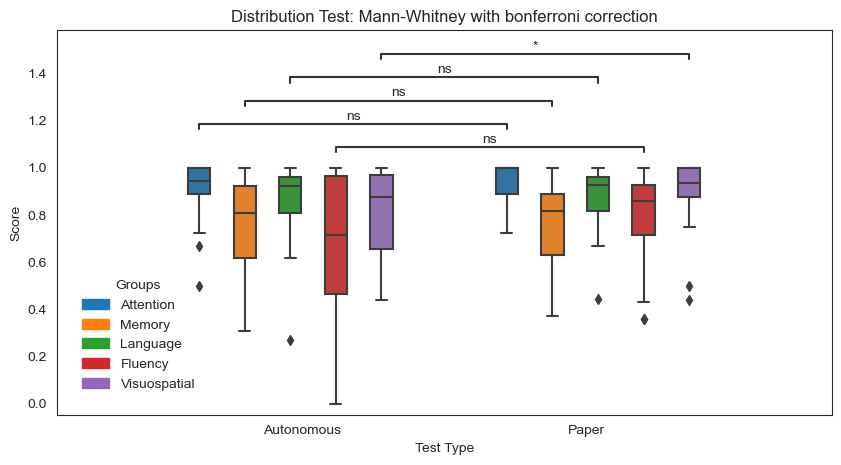

In [212]:
comparisons_dict = {
    'Attention': 'Attention.1',
    'Memory': 'Memory.1',
    'Language': 'Language.1', 
    'Fluency': 'Fluency.1',
    'Visuospatial': 'Visuospatial.1',
}
test_type = 'Mann-Whitney'
correction_method = 'bonferroni'
key_label = 'Autonomous'
value_label = 'Paper'
x_label = 'Test Type'
y_label = 'Score'

#----------------------------------------------------------------
plt = plot_distribution_tests(dataframe=data_df,
                        comparisons_dict=comparisons_dict, 
                        test_type=test_type, 
                        correction_method=correction_method,
                        key_label=key_label, 
                        value_label=value_label, 
                        x_label=x_label, 
                        y_label=y_label)
plt
# os.makedirs(os.path.join(out_dir, 'distribution_figures'), exist_ok=True)
# figure.savefig(os.path.join(out_dir, f'distribution_figures/{test_type}_{correction_method}_multiple_comparison_barplot.png'))
# figure.savefig(os.path.join(out_dir, f'distribution_figures/{test_type}_{correction_method}_multiple_comparison_barplot_barplot.svg'))
# print('Figure saved to: ', (os.path.join(out_dir, f'icc_figures/{test_type}_{correction_method}_multiple_comparison_barplot')))

# Begin Analysis

In [47]:
print(data_df.columns)

Index(['Total', 'Total.1', 'Completed'], dtype='object')


In [49]:
independent_var_column = 'Completed'
dependent_var_column_list = ['Total', 'Total.1']

#Just a name for the sake of figure labels
dependent_var_column_labels = 'Test Type'

#A name for the value of the melted column
measurement_category = 'Score'

#-------------------------------------------------------------------    


# Copy the dataframe to avoid changing the original data
df_to_melt = data_df.copy()
index_column=independent_var_column
dep_var_type=dependent_var_column_list
dep_var_category=dependent_var_column_labels

# Melt dataframe
melted_df = pd.melt(df_to_melt, id_vars=index_column, value_vars=dep_var_type, var_name=dep_var_category, value_name=measurement_category)
melted_df

display(melted_df)

,Completed,Test Type,Score
0,1.0,Total,0.969697
1,1.0,Total,0.707071
2,1.0,Total,0.727273
3,1.0,Total,0.808081
4,1.0,Total,0.858586
...,...,...,...
65,1.0,Total.1,1.000000
66,1.0,Total.1,1.000000
67,1.0,Total.1,0.979592
68,1.0,Total.1,0.938776


In [50]:
#Info
df_to_melt_info = df_to_melt.describe().transpose()
display(df_to_melt_info)

,count,mean,std,min,25%,50%,75%,max
Total,35.0,0.819048,0.140421,0.515152,0.727273,0.858586,0.939394,1.0
Total.1,35.0,0.890087,0.098189,0.591837,0.826531,0.918367,0.974490,1.0
Completed,35.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0


## Option A - Generate a Boxplot with Tukey HSD Post Hoc for a given effect

## Generate a Tukey HSD Post Hoc

In [51]:
# Statsmodels Tukey
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Step 1: Two-way ANOVA
formula = f'Q("{measurement_category}") ~ C(Q("{index_column}")) + C(Q("{dep_var_category}")) + C(Q("{index_column}")):C(Q("{dep_var_category}"))'
model = ols(formula, data=melted_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table to see the indices
display(anova_table)



ValueError: must have at least one row in constraint matrix

In [329]:

#----------------------------------------------------------------DO NOT CHANGE BELOW

# Step 2: Post-hoc tests if interaction is significant
# First, check the ANOVA table indices and then access the appropriate index.
# For example, if the index is 'Age:Network' use that to access the p-value
interaction_index = f'C(Q("{index_column}")):C(Q("{dep_var_category}"))'  # change this based on the printed ANOVA table



# Perform Tukey's HSD test
# tukey = pairwise_tukeyhsd(endog=df['Damage Score'],
#                           groups=df['Cohort_Lobe'],
#                           alpha=0.05)

# Step 2: Post-hoc tests if interaction is significant
if anova_table.loc[interaction_index, 'PR(>F)'] < 0.05:
    
    pre_tukey_df = melted_df.copy()
    # Create a new column combining Cohort and Lobe information
    pre_tukey_df['Combined_Column'] = pre_tukey_df[index_column] + '_' + pre_tukey_df[dep_var_category]
    
    # Perform Tukey's test
    tukey = pairwise_tukeyhsd(endog=pre_tukey_df[measurement_category],
                              groups=pre_tukey_df['Combined_Column'],
                              alpha=0.05)
    
    # Create a DataFrame from the Tukey's test summary
    tukey_df = pd.DataFrame(data=tukey.summary()[1:], columns=tukey.summary()[0])
    
    # Display the results of the Tukey's test
    display(tukey_df)
else:
    print("The interaction was not significant")


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Alzheimer_Age,Parkinson_Age,-8.699,0.0,-12.6445,-4.7535,True


In [330]:
print(tukey_df.columns[0])



group1


In [331]:
#----------------DO NOT TOUCH
group1_column = tukey_df.columns[0]
group2_column = tukey_df.columns[1]


# Convert columns to string type
tukey_df[group1_column] = tukey_df[group1_column].astype(str)
tukey_df[group2_column] = tukey_df[group2_column].astype(str)

# Function to extract the lobe part from the combined column
def extract_lobe(group):
    return '_'.join(group.split('_')[1:])

# Filter the rows where the lobe part is the same, but the cohort part is different
filtered_df = tukey_df[
    (tukey_df[group1_column].map(extract_lobe) == tukey_df[group2_column].map(extract_lobe)) &
    (tukey_df[group1_column].map(lambda x: x.split('_')[0]) != tukey_df[group2_column].map(lambda x: x.split('_')[0]))
]

# Display the filtered DataFrame
display(filtered_df)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Alzheimer_Age,Parkinson_Age,-8.699,0.0,-12.6445,-4.7535,True


ValueError: Must be a color for each trace level

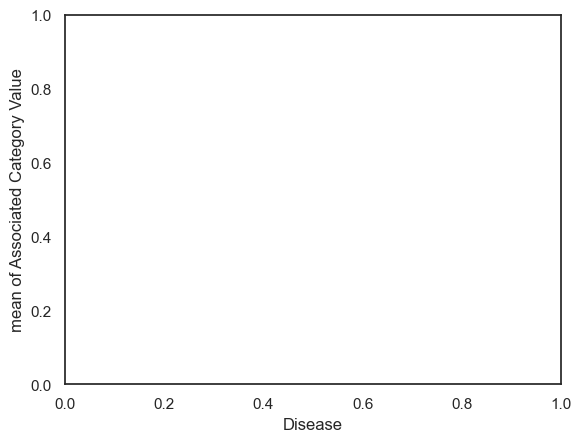

In [332]:
#Visualize interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
intrxn_plot = interaction_plot(x=melted_df[index_column], trace=melted_df[dep_var_category], response=melted_df[measurement_category])#, colors=colors)
intrxn_plot.set_size_inches(5, 7, forward=True)

ValueError: too many values to unpack (expected 2)

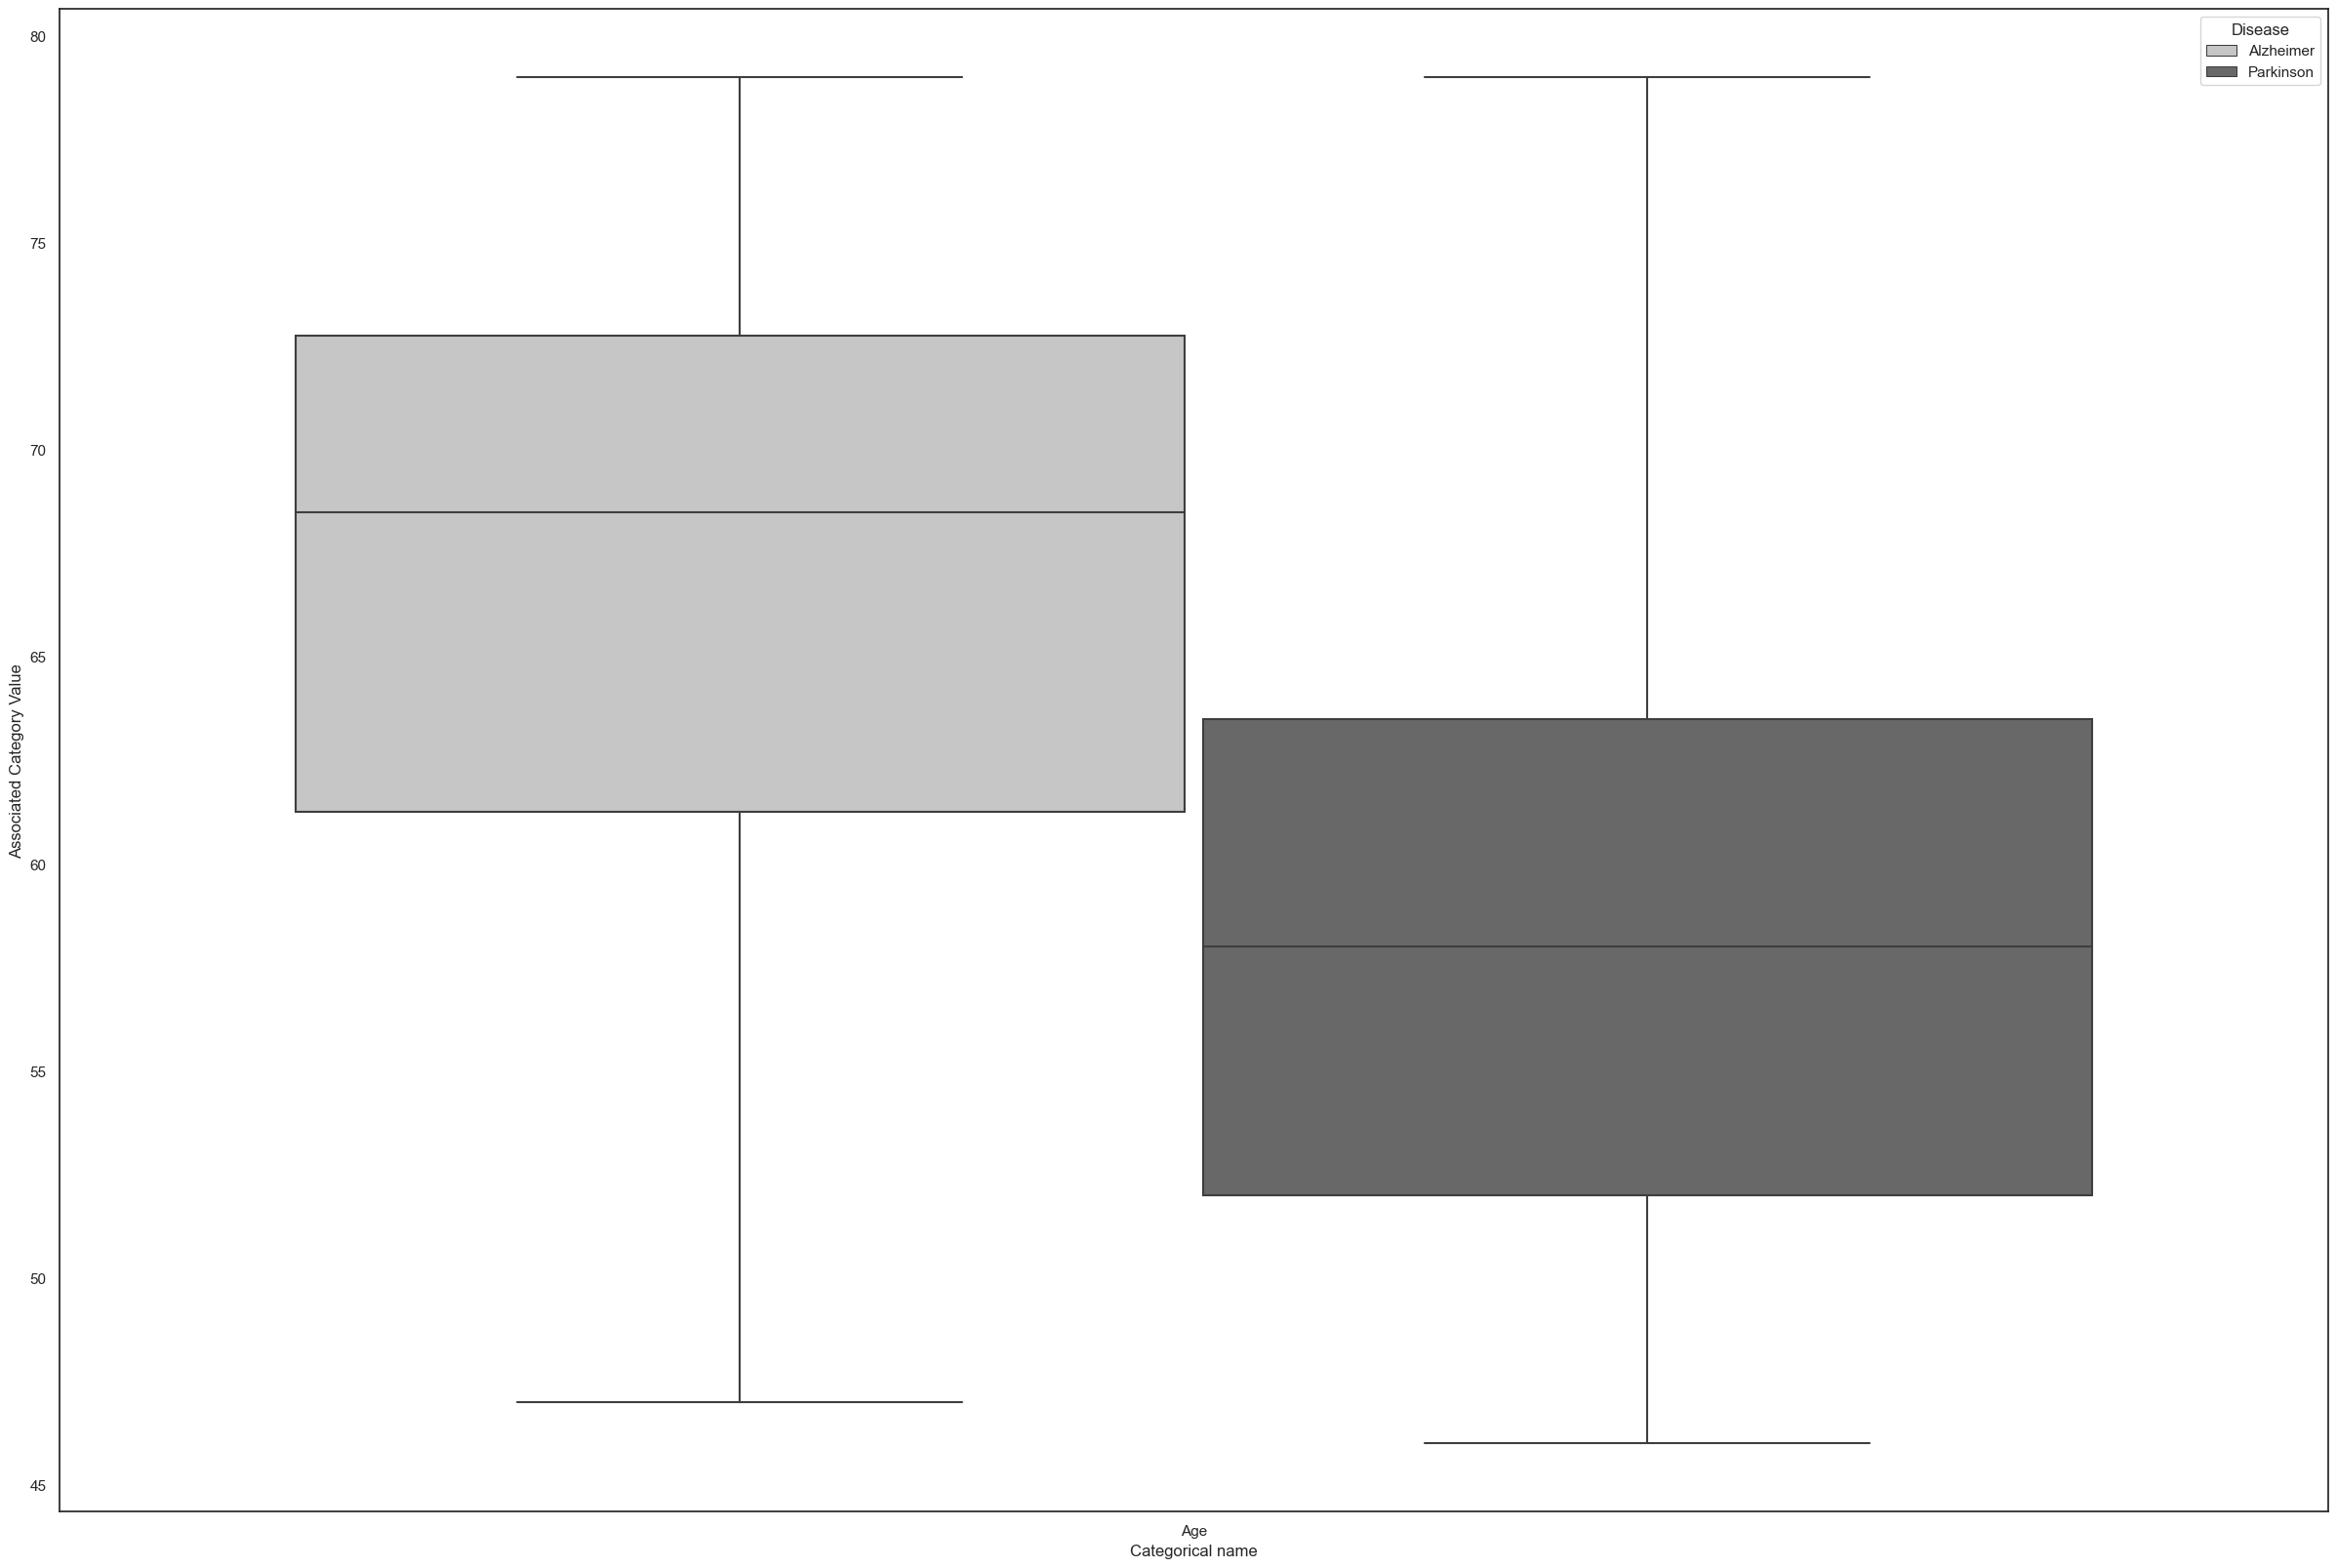

In [333]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

x_label = 'Lobe'
y_label = 'Damage Score'
#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
# Assuming filtered_df is already defined with your data
# Extract pairs and p-values from filtered_df
pairs = [(f"{row[filtered_df.columns[0]]}", 
          f"{row[filtered_df.columns[1]]}") 
          for _, row in filtered_df.iterrows()]

# pairs = [(f"{row[filtered_df[filtered_df.columns[0]]]}", 
#           f"{row[filtered_df[filtered_df.columns[1]]]}") 
#           for _, row in filtered_df.iterrows()]

# pairs = [(f"{row[filtered_df[filtered_df.columns[0]]]}_{row[dep_var_category]}", 
#           f"{row[filtered_df[filtered_df.columns[1]]]}_{row[dep_var_category]}") 
#           for _, row in filtered_df.iterrows()]

# Convert p-values to float
p_values = [float(str(row[filtered_df.columns[3]])) for _, row in filtered_df.iterrows()]

# Create figure and axis
fig, ax = plt.subplots(figsize=(30, 20))

# Plot with seaborn, using 'hue' to differentiate between Alzheimer's and Parkinson's within each Lobe
sns.boxplot(data=melted_df, x=dep_var_category, y=measurement_category, hue=index_column, ax=ax)

# Add annotations using statannotations
annotator = Annotator(ax, pairs=pairs, data=melted_df, x=dep_var_category, y=measurement_category, hue=index_column)
annotator.configure(test=None, text_format="star", loc="inside", verbose=2)
annotator.set_pvalues(p_values)
annotator.annotate()

# Label and show
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.xticks(rotation=45)
plt.legend(title=index_column, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Alzheimer_Age vs. Parkinson_Age: Custom statistical test, P_val:0.000e+00


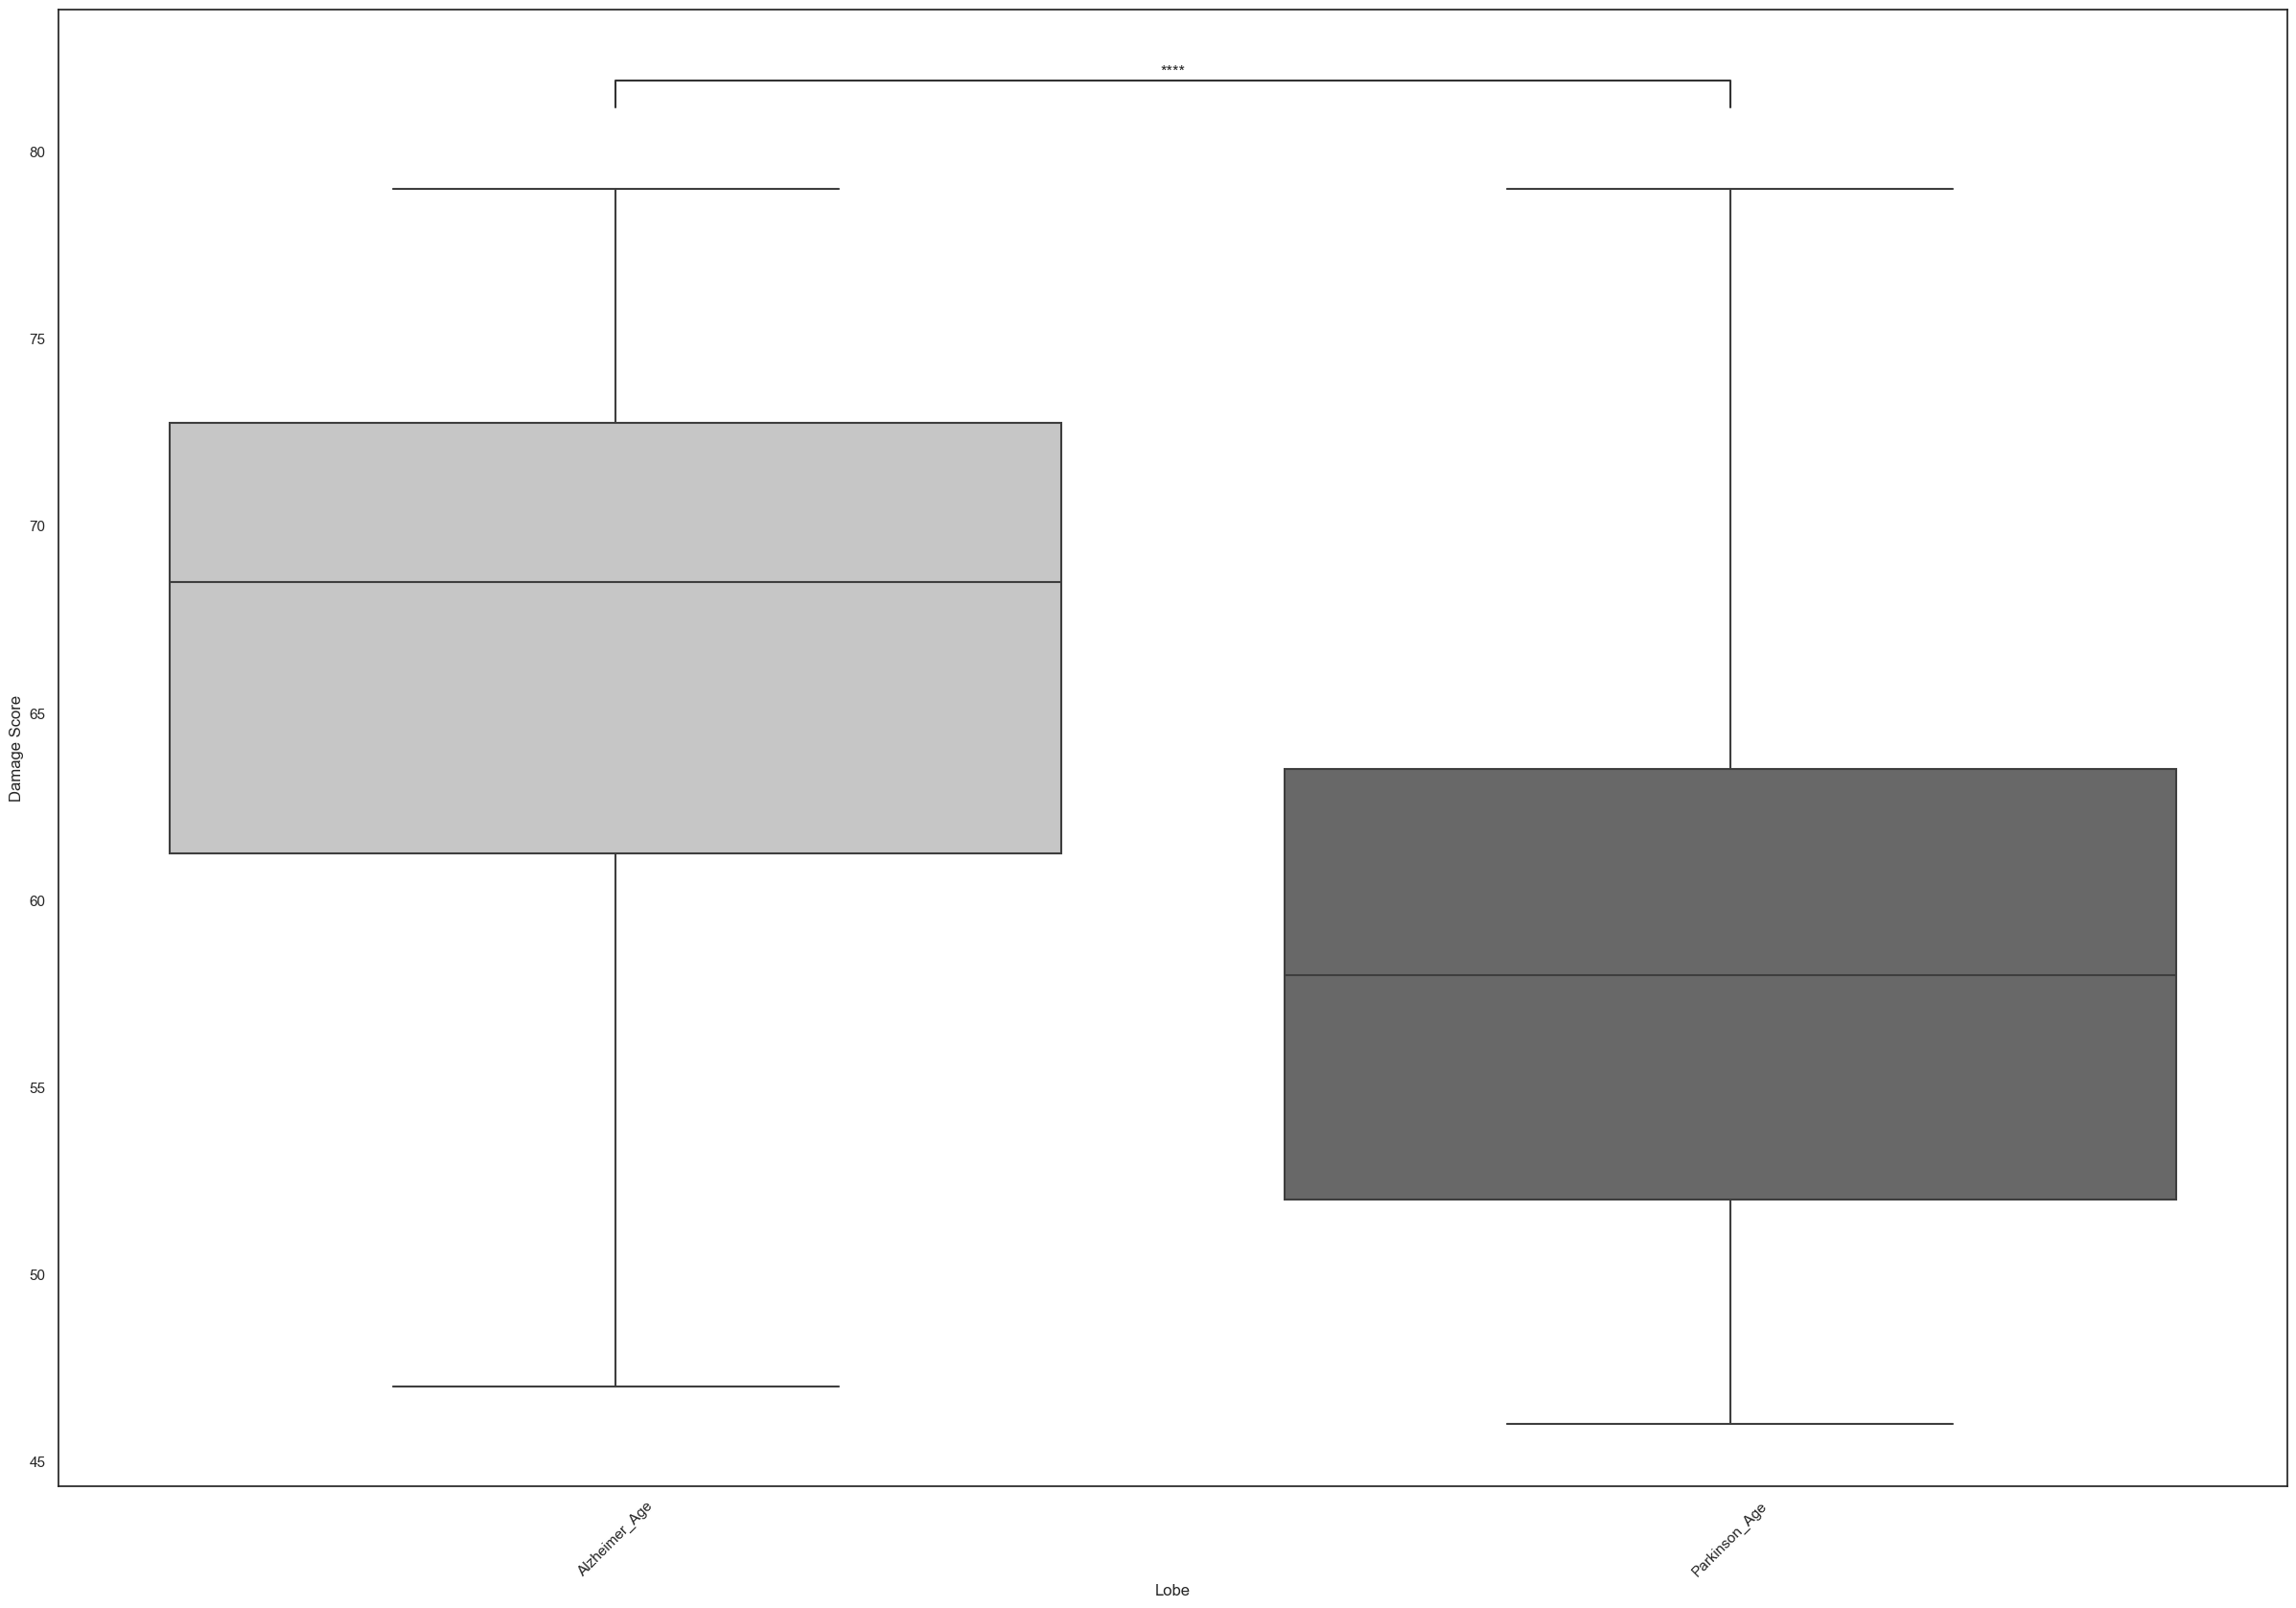

In [334]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

x_label = 'Lobe'
y_label = 'Damage Score'
#----------------------------------------------------------------DO NOT MODIFY----------------------------------------------------------------
# Assuming melted_df is already defined with your data
melted_df['combined_group'] = melted_df[index_column] + '_' + melted_df[dep_var_category]

# Assuming filtered_df is already defined with your data
# Extract pairs and p-values from filtered_df
pairs = [(row[filtered_df.columns[0]], row[filtered_df.columns[1]]) for _, row in filtered_df.iterrows()]

# Convert p-values to float
p_values = [float(str(row[filtered_df.columns[3]])) for _, row in filtered_df.iterrows()]

# Create figure and axis
fig, ax = plt.subplots(figsize=(30, 20))

# Plot with seaborn
sns.boxplot(data=melted_df, x='combined_group', y=measurement_category, ax=ax)

# Add annotations using statannotations
annotator = Annotator(ax, pairs=pairs, data=melted_df, x='combined_group', y=measurement_category)
annotator.configure(test=None, text_format="star", loc="inside", verbose=2)
annotator.set_pvalues(p_values)
annotator.annotate()

# Label and show
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.xticks(rotation=45)
plt.show()


## Option B - This is more like distribution testing (T-tests, wilcoxon tests, etc) 
- run normality testing to help choose a main test
- choose main test
- choose multiple corrections test
- generate a box plot
- annotate it

Assess Normality to Determine what Test to Use

In [52]:
import scipy.stats as stats

# Assuming melted_df is your DataFrame, and you have columns named dependent_var_column and index_column

# Getting unique values from dependent_var_column
unique_dependent_vars = melted_df[dep_var_category].unique()

# Iterating through each unique value in dependent_var_column
for unique_var in unique_dependent_vars:
    # Filtering data for current unique dependent_var
    sub_df = melted_df[melted_df[dep_var_category] == unique_var]
    
    # Finding distinct index_column groups
    index_groups = sub_df[index_column].unique()
    
    # Checking normality for each group
    for index_group in index_groups:
        group_data = sub_df[sub_df[index_column] == index_group][measurement_category]
        
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = stats.shapiro(group_data)
        
        # Anderson-Darling test
        anderson_result = stats.anderson(group_data)
        
        print(f'For {unique_var}, {index_group}:')
        print(f'Shapiro-Wilk: statistic={shapiro_stat}, p-value={shapiro_p}')
        print(f'Anderson-Darling: statistic={anderson_result.statistic}, critical values={anderson_result.critical_values}, significance_levels={anderson_result.significance_level}')
        print('--------------------------')

# After checking for normality, you can decide whether to use Mann-Whitney U test or t-test


For Total, 1.0:
Shapiro-Wilk: statistic=0.9186497926712036, p-value=0.013037269935011864
Anderson-Darling: statistic=0.8446321205849046, critical values=[0.527 0.6   0.719 0.839 0.998], significance_levels=[15.  10.   5.   2.5  1. ]
--------------------------
For Total.1, 1.0:
Shapiro-Wilk: statistic=0.902204692363739, p-value=0.004534715786576271
Anderson-Darling: statistic=0.9679138539703018, critical values=[0.527 0.6   0.719 0.839 0.998], significance_levels=[15.  10.   5.   2.5  1. ]
--------------------------


In [53]:
import pandas as pd
import scipy.stats as stats

# Create an empty DataFrame to store the results
normality_results = pd.DataFrame(columns=['dependent_var', 'index_group', 'shapiro_stat', 'shapiro_p', 'anderson_stat', 'anderson_critical_values', 'anderson_significance_levels'])

# Getting unique values from dependent_var_column
unique_dependent_vars = melted_df[dep_var_category].unique()

# Iterating through each unique value in dependent_var_column
for unique_var in unique_dependent_vars:
    # Filtering data for current unique dependent_var
    sub_df = melted_df[melted_df[dep_var_category] == unique_var]
    
    # Finding distinct index_column groups
    index_groups = sub_df[index_column].unique()
    
    # Checking normality for each group
    for index_group in index_groups:
        group_data = sub_df[sub_df[index_column] == index_group][measurement_category]
        
        # Shapiro-Wilk test
        shapiro_stat, shapiro_p = stats.shapiro(group_data)
        
        # Anderson-Darling test
        anderson_result = stats.anderson(group_data)
        
        # Append the results to the DataFrame
        normality_results = normality_results.append({
            'dependent_var': unique_var,
            'index_group': index_group,
            'shapiro_stat': shapiro_stat,
            'shapiro_p': shapiro_p,
            'anderson_stat': anderson_result.statistic,
            'anderson_critical_values': anderson_result.critical_values,
            'anderson_significance_levels': anderson_result.significance_level
        }, ignore_index=True)

normality_results

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_73534/3735261075.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_results = normality_results.append({
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_73534/3735261075.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normality_results = normality_results.append({


,dependent_var,index_group,shapiro_stat,shapiro_p,anderson_stat,anderson_critical_values,anderson_significance_levels
0,Total,1.0,0.918650,0.013037,0.844632,"[0.527, 0.6, 0.719, 0.839, 0.998]","[15.0, 10.0, 5.0, 2.5, 1.0]"
1,Total.1,1.0,0.902205,0.004535,0.967914,"[0.527, 0.6, 0.719, 0.839, 0.998]","[15.0, 10.0, 5.0, 2.5, 1.0]"


In [65]:
melted_df['Completed'] = np.where(melted_df['Test Type'] == 'Total', 1, 0)


In [68]:
melted_df

,Completed,Test Type,Score
0,1,Total,0.969697
1,1,Total,0.707071
2,1,Total,0.727273
3,1,Total,0.808081
4,1,Total,0.858586
...,...,...,...
65,0,Total.1,1.000000
66,0,Total.1,1.000000
67,0,Total.1,0.979592
68,0,Total.1,0.938776


In [66]:
from itertools import combinations
# Assuming melted_df is your DataFrame, and you have columns named dependent_var_column and index_column

pairs = []

# Getting unique values from dependent_var_column
unique_dep_vars = melted_df[dep_var_category].unique()

# Getting unique values from index_column
unique_index_vars = melted_df[index_column].unique()

# Iterating through each unique value in dependent_var_column
for dep_var in unique_dep_vars:
    # Generating pairs among index_column groups for the current dependent_var
    for index_group1, index_group2 in combinations(unique_index_vars, 2):
        current_pair = ((index_group1, dep_var), (index_group2, dep_var))
        
        # Adding these pairs to the main list
        pairs.append(current_pair)

# Now pairs will have the desired pairs for plotting
print(pairs)



[((1, 'Total'), (0, 'Total')), ((1, 'Total.1'), (0, 'Total.1'))]


ValueError: `x` and `y` must be of nonzero size.

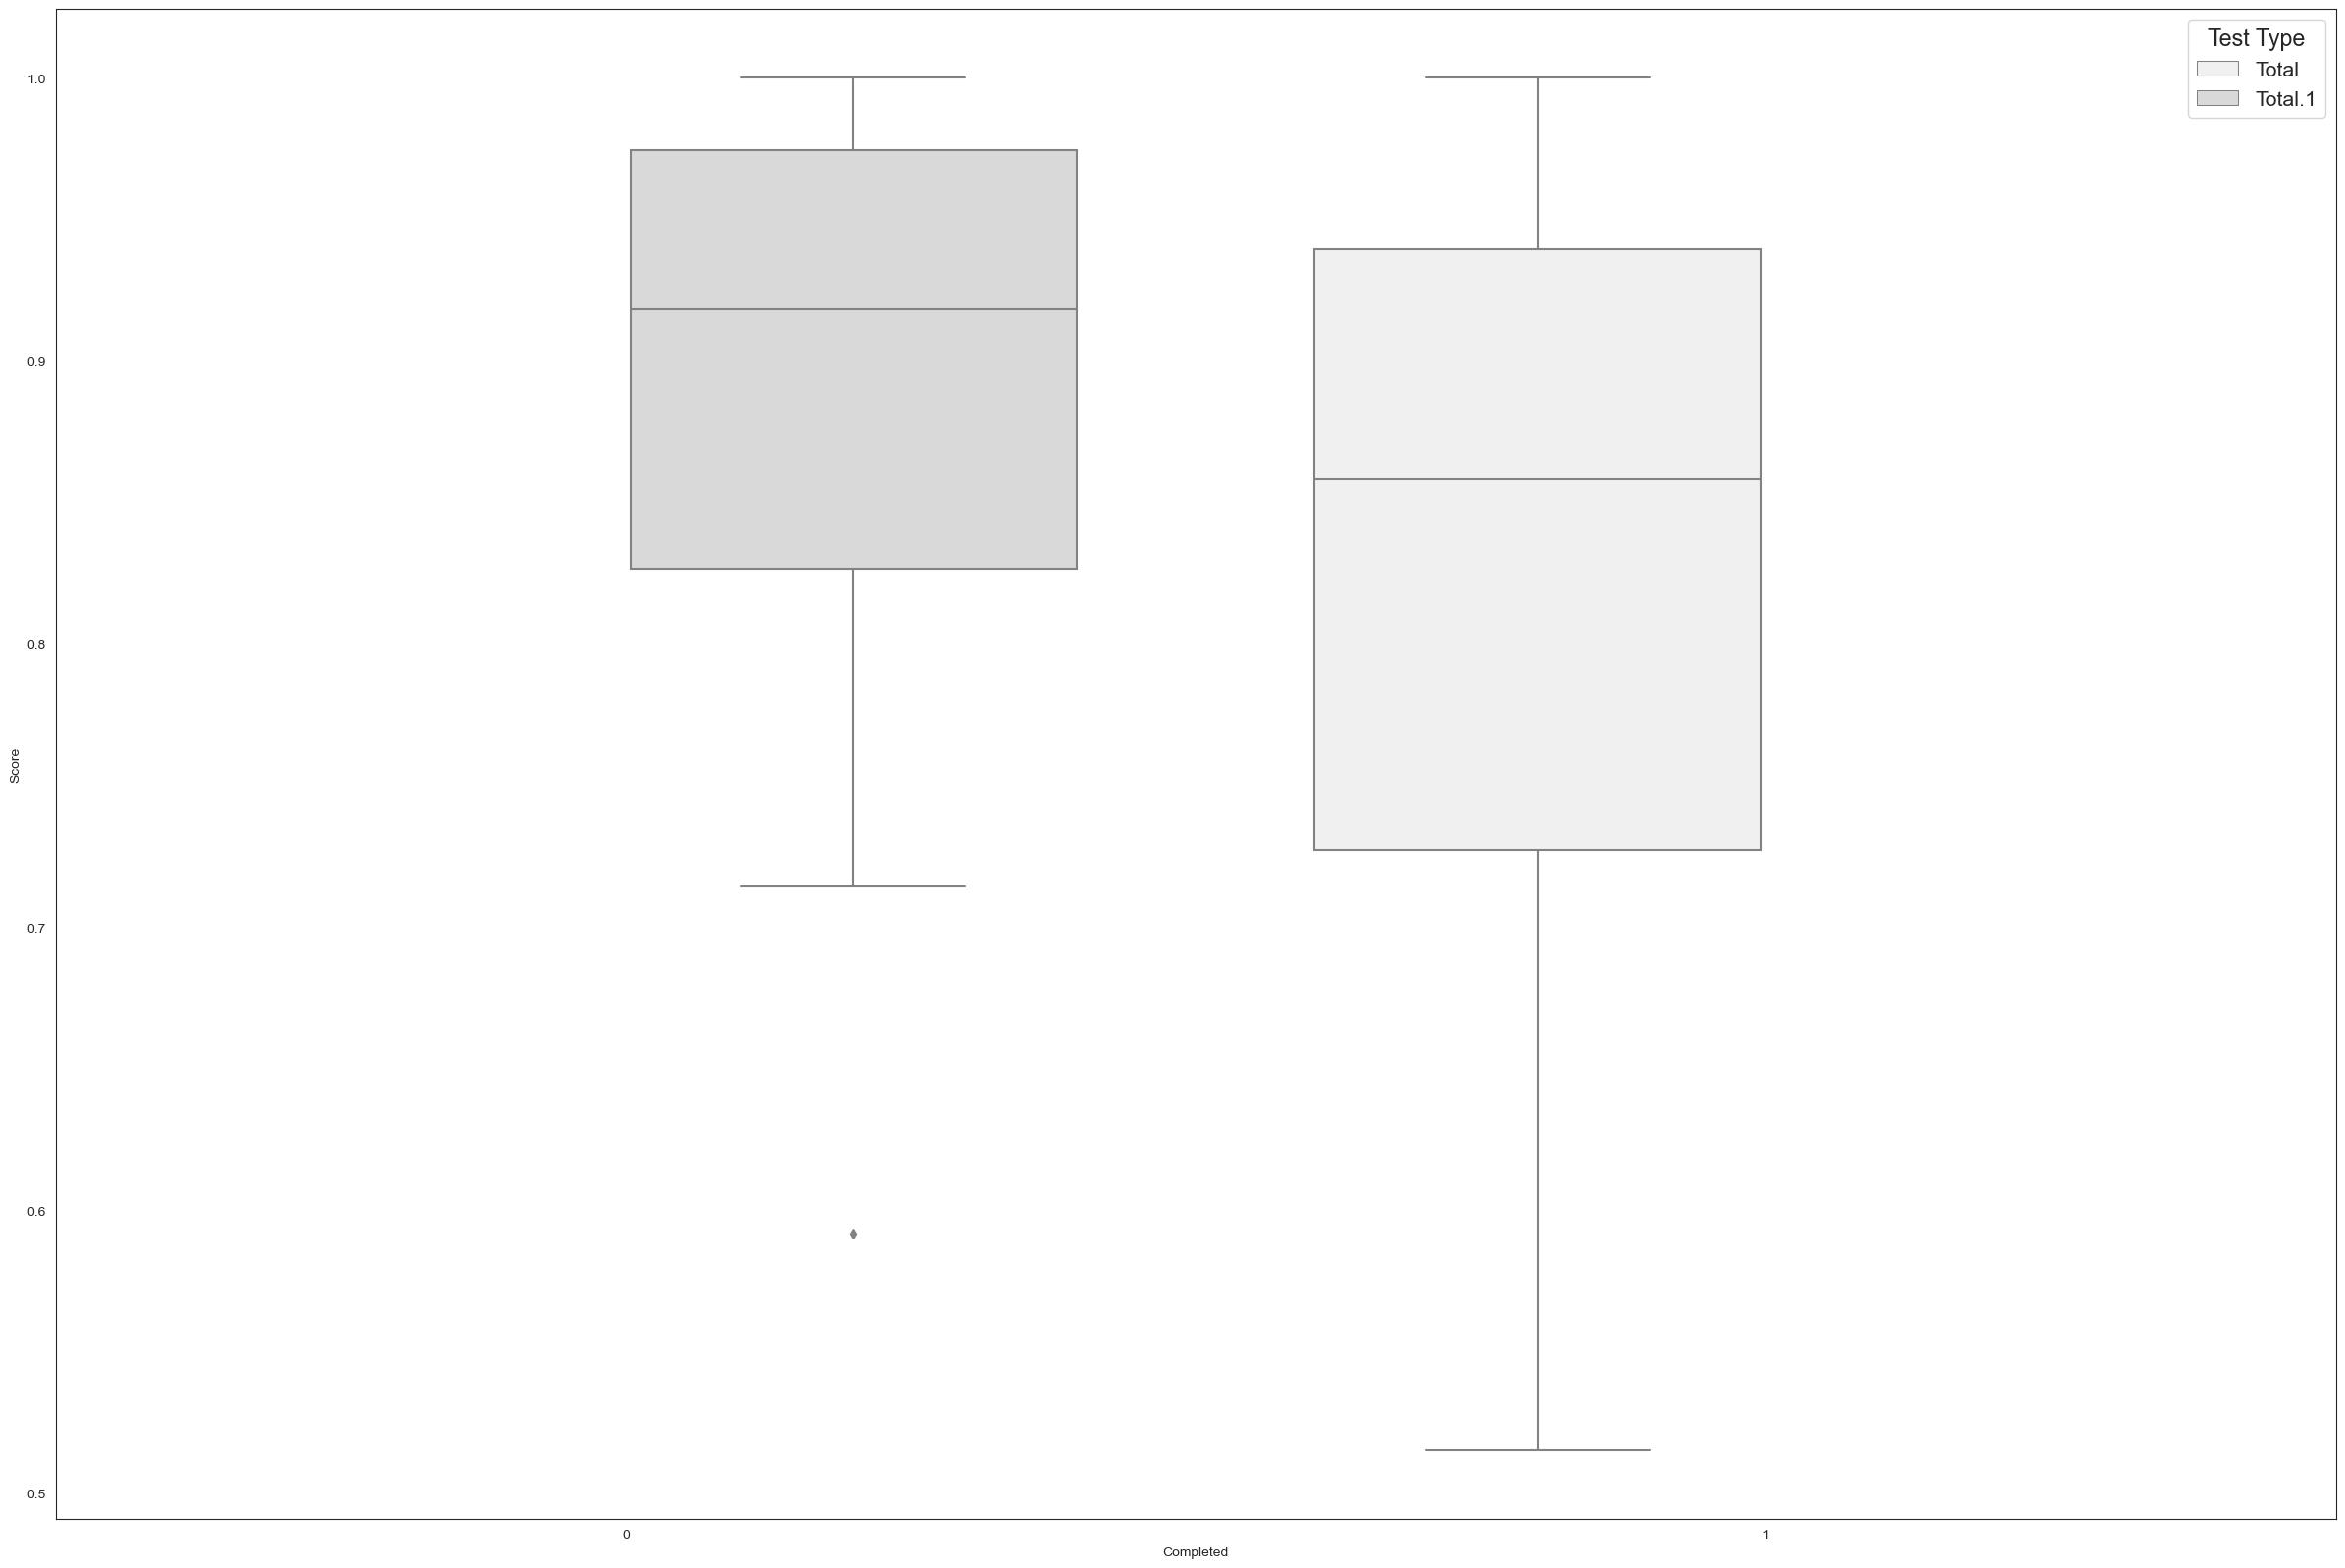

In [67]:
from statannotations.Annotator import Annotator
from statannotations import utils as utils
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# A few helper functions:
import numpy as np
from scipy.stats import mannwhitneyu, normaltest, tukey_hsd, ttest_ind, kruskal, levene, brunnermunzel, wilcoxon
fig2, ax = plt.subplots(1,1, figsize=(30, 20))

main_tests = ['t-test_ind', 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal', 'Brunner-Munzel']
post_hoc_tests = ['bonferroni', 'bonf', 'Bonferroni', 'holm-bonferroni', 'HB', 'Holm-Bonferroni', 'holm', 'benjamini-hochberg', 'BH', 'fdr_bh', 'Benjamini-Hochberg', 'fdr_by', 'Benjamini-Yekutieli', 'BY', None]

##----------------------------------------------------------------USER INPUT BELOW----------------------------------------------------------------
main_test = 'Mann-Whitney'# #main_tests[0]
post_hoc_test = 'bonferroni' #post_hoc_tests[3]
x_label = 'Tissue Segments'
y_label = 'Z Score Mean Volume'
num_categories_tested = 1
##----------------------------------------------------------------USER INPUT ABOVE----------------------------------------------------------------

#Manipulate the pairs generated from stats annotation
grey_colors = ['#F0F0F0', '#D9D9D9', '#B3B3B3', '#A6A6A6', '#999999', '#7F7F7F', '#666666', '#4D4D4D', '#333333', '#1A1A1A']
customPalette = sns.set_palette(sns.color_palette(grey_colors))
hue_plot_params = {
    'data': melted_df,
    'x': index_column,
    'y': measurement_category,
    "hue": dep_var_category,
    "palette": customPalette
}

with sns.plotting_context("notebook", font_scale=1.4):
        # Plot with seaborn
        ax = sns.boxplot(ax=ax, **hue_plot_params)

        # Add annotations
        annotator = Annotator(ax, **hue_plot_params,
                            pairs=pairs,
                        test=main_test, text_format='full', loc='inside', verbose=2)

        #Specific post-hoc test
        # annotator.configure(test="Mann-Whitney", comparisons_correction="bonferroni")
        _, corrected_results = annotator.configure(test=main_test, comparisons_correction=post_hoc_test).apply_and_annotate()

        # Label and show
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        plt.show()


For t-testing

In [62]:
melted_df

,Completed,Test Type,Score
0,1.0,Total,0.969697
1,1.0,Total,0.707071
2,1.0,Total,0.727273
3,1.0,Total,0.808081
4,1.0,Total,0.858586
...,...,...,...
65,1.0,Total.1,1.000000
66,1.0,Total.1,1.000000
67,1.0,Total.1,0.979592
68,1.0,Total.1,0.938776


KeyError: 'Total'

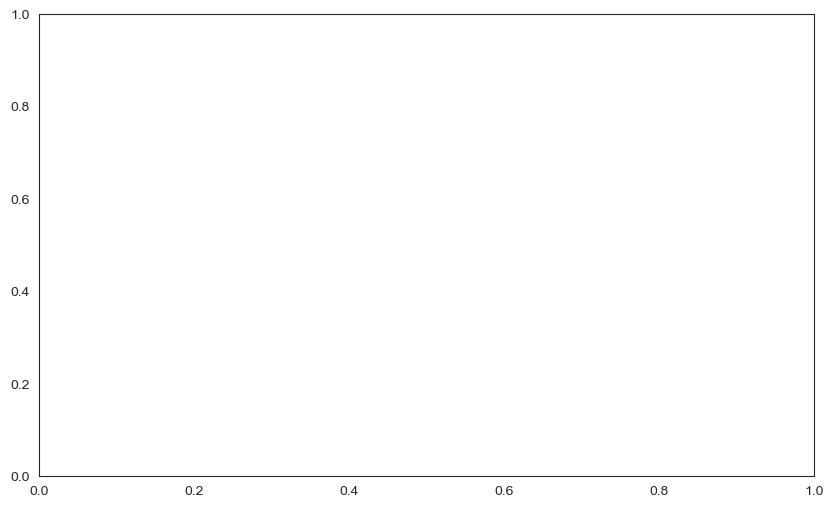

In [61]:
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

main_test = 'Mann-Whitney'# #main_tests[0]
post_hoc_test = 'bonferroni' #post_hoc_tests[3]
x_label = 'Disease'
y_label = 'Subiculum Connectivity'


sns.boxplot(x=index_column, y=measurement_category, data=melted_df, ax=ax)

# Define the pairs for comparison, test type, and post-hoc correction
pairs = [((1, 'Total'), (0, 'Total')), ((1, 'Total.1'), (0, 'Total.1'))]
main_test = 'Mann-Whitney'
post_hoc_test = 'bonferroni'

# Add annotations using the Annotator class
annotator = Annotator(ax=ax,
                      data=melted_df,
                      x=index_column,
                      y=measurement_category,
                      pairs=pairs,
                      test=main_test,
                      text_format='full',
                      loc='inside',
                      verbose=2)

# Configure and annotate
_, corrected_results = annotator.configure(test=main_test, comparisons_correction=post_hoc_test).apply_and_annotate()

# Label and show the plot
plt.xlabel('Test Type (1=Experimental, 0=Basic)')
plt.ylabel('Score')
plt.show()

##----------------------------------------------------------------USER INPUT ABOVE----------------------------------------------------------------
# Set style and color palette
sns.set_style('white')
sns.set_palette('Greys', len(melted_df[index_column].unique()), desat=1)

# Pairs for comparison
pairs = [("Parkinson", "Alzheimer")]

# Plot parameters
plot_params = {
    'data': melted_df,
    'x': dep_var_type,
    'y': measurement_category,
}

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot with seaborn
sns.boxplot(ax=ax, **plot_params)

# Add annotations
annotator = Annotator(ax=ax,
                      data=melted_df,
                      x=index_column,
                      y=measurement_category,
                      pairs=pairs,
                      test=main_test,
                      text_format='full',
                      loc='inside',
                      verbose=2)

# Configure and annotate
_, corrected_results = annotator.configure(test=main_test, comparisons_correction=post_hoc_test).apply_and_annotate()

# Label and show plot
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
plt.show()


In [60]:
melted_df

,Completed,Test Type,Score
0,1.0,Total,0.969697
1,1.0,Total,0.707071
2,1.0,Total,0.727273
3,1.0,Total,0.808081
4,1.0,Total,0.858586
...,...,...,...
65,1.0,Total.1,1.000000
66,1.0,Total.1,1.000000
67,1.0,Total.1,0.979592
68,1.0,Total.1,0.938776


In [ ]:
#Extract values from statannotations into a saveable DF
comparison_1 = []
comparison_2 = []
p_values = []
test = []
for corrected_result in corrected_results:
    comparison_1.append(corrected_result.structs[0]['group'])
    comparison_2.append(corrected_result.structs[1]['group'])
    p_values.append(corrected_result.data.pvalue)
    test.append(corrected_result.data.test_description)
    
post_hoc_df = pd.DataFrame({'comparison_1': comparison_1, 'comparison_2': comparison_2, 'p_values': p_values, 'post_hoc_test': test})
display(post_hoc_df)

In [ ]:
#Finalize and save

if os.path.exists(out_dir) != True:
    os.makedirs(out_dir)
anova_table.to_csv(out_dir + '2_way_anova_results.csv')
post_hoc_df.to_csv(out_dir + f'post_hoc_results_{test[1]}.csv')
fig1.savefig(out_dir + '2_way_anova_boxplot_tukey_hsd_results.png')
fig2.savefig(out_dir + f'boxplot_{test[1]}.png')
intrxn_plot.savefig(out_dir + f'2_way_anova_interaction_plot.png')
normality_results.to_csv(out_dir + 'normality_test_results.csv', index=False)
print("saved to: ", out_dir)



# Modified Method
- This will print the labels of the columns for you to choose how to interact your model
- You will select the title of the column with the continuous variable and assign it to the variable 'continuous'.
- You will select the title of the column with the categorical variable and assign it to the variable 'categorical_1'
- You will select the title of the column with the categorical variable and assign it to the variable 'categorical_2'

- If you want to create an interaction between variables, you will need to manually create a new column multiplying them

In [ ]:
#Get column names for copy paste below
print(data_df.columns)

In [ ]:
data_df

In [ ]:
continuous = 'outcome'
categorical_1 = 'Stimulation_Atrophy_Match' #This is the categorical variable which will compose the lines
categorical_2 = 'Age' #this is the categorical variable which will compose the x axis bins
#----------------------------------------------------------------DO NOT TOUCH
# Fit the model
model = ols(f'{continuous} ~ C({categorical_1}) + C({categorical_2}) + C({categorical_1}):C({categorical_2})', data=data_df).fit()

# Perform the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot using Seaborn
sns.set(style="ticks") # Set style
plt.figure(figsize=(8, 6)) # Set figure size

# Point plot
sns.pointplot(x=f"{categorical_1}", y=f"{continuous}", hue=f"{categorical_2}", data=data_df, markers=["o", "x"], linestyles=["-", "--"])

# Adding labels and title
plt.xlabel(f"{categorical_1}")
plt.ylabel(f"{continuous}")
plt.title("Interaction Plot")
plt.legend(title=f"{categorical_2}")

# Show plot
plt.show()


/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


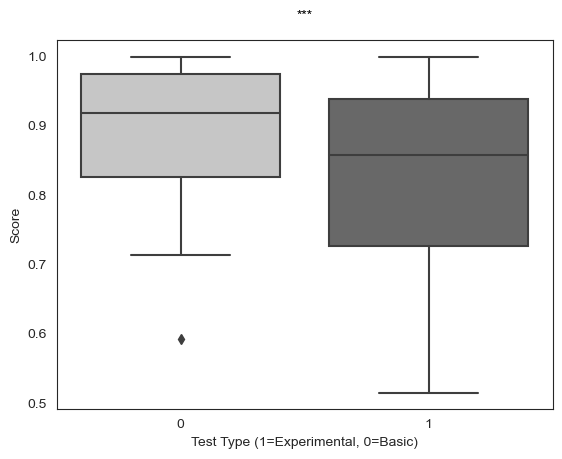

In [75]:
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# Function to annotate the significance
def annotate_significance(ax, p_value, x1, x2, y):
    significance = ""
    if p_value < 0.05:
        significance = "*"
    if p_value < 0.01:
        significance = "**"
    if p_value < 0.001:
        significance = "***"
    ax.annotate("", xy=(x1, y), xycoords='data', xytext=(x2, y), textcoords='data',
                arrowprops=dict(arrowstyle="-", lw=1.5))
    ax.text((x1 + x2) * .5, y, significance, ha='center', va='bottom', color="black")

# Separate the data into two groups
group1 = melted_df[melted_df['Completed'] == 1]['Score']
group2 = melted_df[melted_df['Completed'] == 0]['Score']

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(group1, group2)
sns.set_palette('Greys', len(melted_df[index_column].unique()), desat=1)
# Plot the data using Seaborn's boxplot
ax = sns.boxplot(x='Completed', y='Score', data=melted_df)
# ax = sns.swarmplot(x='Completed', y='Score', data=melted_df, color=".25") # Optional: add data points

# Find the y position for the annotation
y_max = melted_df['Score'].max() + 0.05 # You can adjust this value as needed

# Annotate the plot with the significance stars
annotate_significance(ax, p_value, 0, 1, y_max)

plt.xlabel('Test Type (1=Experimental, 0=Basic)')
plt.ylabel('Score')
plt.show()
